In [45]:
import numpy as np
import sys
import sys
import matplotlib.pyplot as plt

def read_data(filepath):
    """Read the N by 6 array from the text file."""
    return np.loadtxt(filepath, delimiter=',')

def calculate_error(data, desired_point):
    """Calculate the Euclidean distance from each point in the array to the desired point."""
    positions = data[:, 0:3] # Get the xpos, ypos, zpos columns (first 3 points)
    time = data[:, 3] # Get the time_boot_ms column
    errors = np.sqrt(((positions - desired_point) ** 2).sum(axis=1))
    print("Reached Point: ", positions[-1]);
    print("Desired Point: ", desired_point);
    print("Time Taken: ", time[-1]-time[0]);
    return errors, time

def plot_errors(errors, time, save=True, filename='errors.png', margin=1): # Margin is the percentage of the data to ignore in min search window
    """Plot the errors using matplotlib and annotate the minimum error."""
    plt.figure(figsize=(10, 5))
    plt.plot(time, errors, marker='o', markersize=1)
    plt.title('Euclidean Distance Between Each Point and Desired Point')
    plt.xlabel('Time(ms)')
    plt.ylabel('Distance')
    plt.grid(True)

    # Find and annotate the minimum error
    print(np.min(errors[int(errors.shape[0]*margin):]));
    cutoff_point = int(errors.shape[0]*margin);
    min_error_index = np.argmin(errors[cutoff_point:]) + cutoff_point
    min_error = errors[min_error_index]
    min_error_time = time[min_error_index]
    plt.annotate(f'Min error: {min_error:.2f}', xy=(min_error_time, min_error), xytext=(min_error_time, min_error+1),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')
    if save:
        plt.savefig(filename);
    plt.show()

def print_minimum_error(errors):
    """Print the minimum error and its index."""
    min_error_index = np.argmin(errors)
    min_error = errors[min_error_index]
    print(f"The minimum error is {min_error:.2f} at index {min_error_index}")

In [46]:
def pos_plot(pos, time, pos_type='X', save=True, filename='_pos.png'):
    # Plot X axis
    plt.figure(figsize=(10, 5))
    plt.plot(time, pos, marker='o', markersize=1)
    plt.title(f'Position of {pos_type} axis')
    plt.xlabel('Time(ms)')
    plt.ylabel('Position')
    plt.grid(True)
    if save:
        plt.savefig(f'{pos_type}{filename}');
    plt.show()

In [47]:
DATA_FOLDER = '../data/'
IMU_FILE = DATA_FOLDER + 'raw_imu_data.txt';
POSITION_FILE_NED = DATA_FOLDER + 'local_position_data.txt'

print("Reading pos data from ", POSITION_FILE_NED)
pos_data = read_data(POSITION_FILE_NED)

print("Reading imu data from ", IMU_FILE)
imu_data = read_data(IMU_FILE)

Reading pos data from  ../data/local_position_data.txt
Reading imu data from  ../data/raw_imu_data.txt


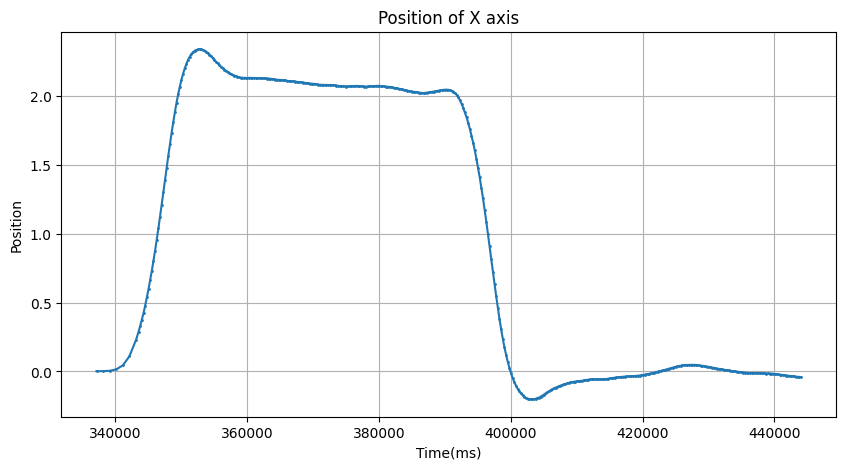

Reached Point:  [-0.04096305 -0.07083096  0.34689313]
Desired Point:  [ 0.00203884 -0.05477283  0.53882498]
Time Taken:  106881.0
0.043014975318243845


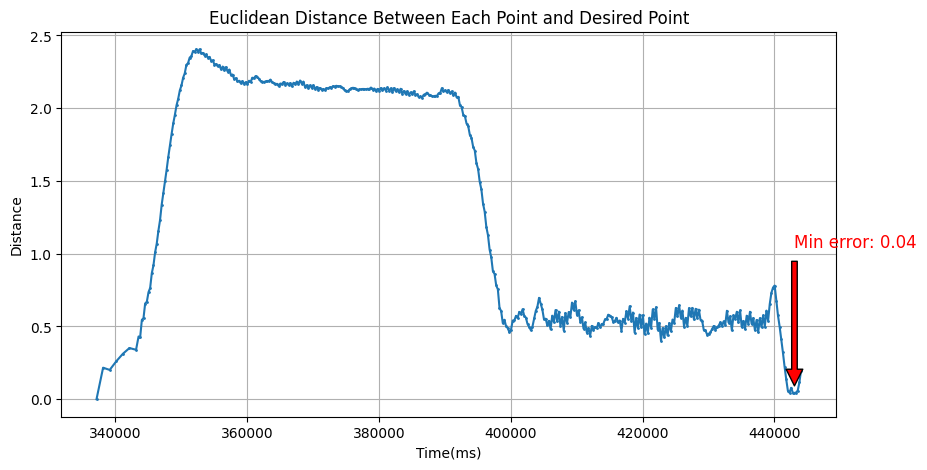

The minimum error is 0.00 at index 0


In [48]:

time = pos_data[:, 3] # Get the time_boot_ms column
pos_plot(pos_data[:, 0], time, 'X', save=True, filename='pos_bf.png')

# Figure out error between initial and final positions
# Filter out the first 20% of data
desired_point = pos_data[0, 0:3] # Desired point for BF is the first point in the data
# pos_data_m = pos_data[int(0.4*len(pos_data)):, :]
errors, time = calculate_error(pos_data, desired_point)
plot_errors(errors, time, save=True, filename='errors_bf.png', margin=0.4)
print_minimum_error(errors)

We see here an error of 4% between the intial and final position when translating back and forth along the X axis